In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

df = pd.DataFrame(data.data, columns=data.feature_names) # Cria o dataframe de atributos
df['class'] = data.target # Define o atributo alvo: binário diagnóstico(maligno/benigno).

df.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
from sklearn.linear_model import Perceptron

sample_df = df.sample(n=500, random_state=42)


# Selecionar X e y
X = sample_df.iloc[:, :2]  # Todas as colunas menos a última
y = sample_df.iloc[:, -1]   # Apenas a última coluna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


clf = Perceptron(max_iter=100) # criação do modelo, com iteração máxima.
clf.fit(X_train,y_train) # Treinamento do modelo com os dados de treino

w = clf.coef_[0]  # Coeficientes (w1, w2)
b = clf.intercept_[0]  # Intercepto (w0)
print("Intercepto (w0):", b)  # Viés
print("Coeficiente (w1,w2):", w)      # pesos

# Fazer previsões no conjunto de teste
yhat = clf.predict(X_test) 

acc_train = clf.score(X_train, y_train)
print(f"Accuracy from training data: {acc_train}")
acc_test = clf.score(X_test, y_test)
print(f"Accuracy from test data: {acc_test}")


Intercepto (w0): 768.0
Coeficiente (w1,w2): [-75.898   8.98 ]
Accuracy from training data: 0.7
Accuracy from test data: 0.59


c:\Users\oalbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


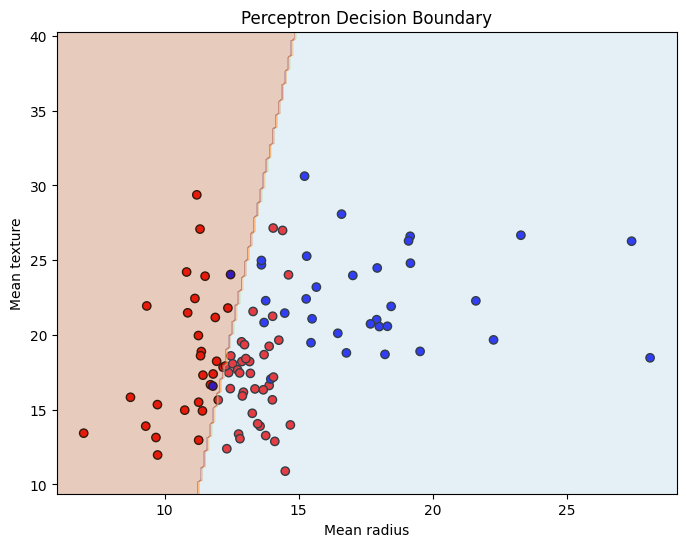

In [51]:
import matplotlib.pyplot as plt

#X_train = X_train.iloc[:, :2]  # Seleciona apenas as duas primeiras colunas
#X_test = X_test.iloc[:, :2]    # Faz o mesmo para o conjunto de teste
# Plotar o gráfico
plt.figure(figsize=(8, 6))

# Dados de treinamento
#plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm', label='Treino', edgecolor='k', alpha=0.7)

x1 = X_test.iloc[:, 0]
x2 = X_test.iloc[:, 1]
color = ['red' if value == 1 else 'blue' for value in y_test]

# Dados de teste
plt.scatter(x1, x2, c=color, cmap=plt.cm.Paired, label='Teste', edgecolor='k', marker='o')

# Definir os limites do gráfico
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

# Geração de uma malha de pontos para a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a fronteira de decisão
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Configurações finais
plt.title("Perceptron Decision Boundary")
plt.xlabel("Mean radius")
plt.ylabel("Mean texture")
plt.show()

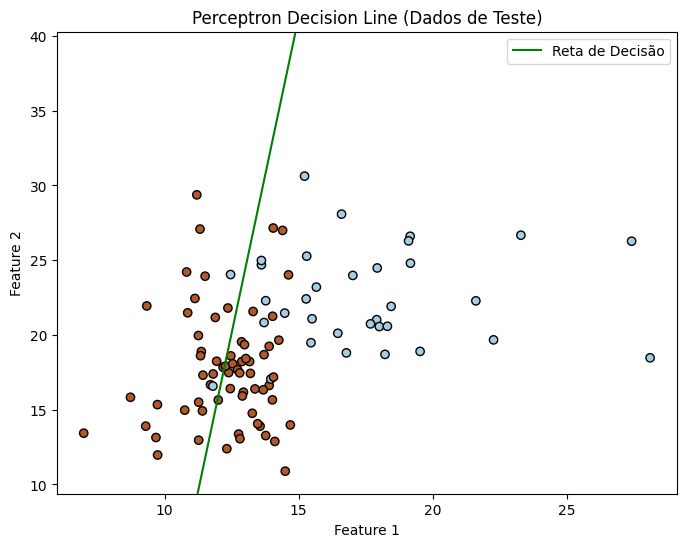

In [50]:
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(8, 6))

clf = Perceptron(max_iter=100) # criação do modelo, com iteração máxima.
clf.fit(X_train,y_train) # Treinamento do modelo com os dados de treino

# Calculando a inclinação (a) e a interceptação (b) da reta
a = -clf.coef_[0][0] / clf.coef_[0][1]  # Inclinação
b = -clf.intercept_[0] / clf.coef_[0][1]     # Interceptação

# Definir os limites do gráfico
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

# Gerar a reta de decisão
x_vals = np.linspace(x_min, x_max, 200)
y_vals = a * x_vals + b  # Reta de decisão

#color = ['red' if value == 1 else 'blue' for value in y_test]
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.Paired, marker='o', edgecolors='k') # c=y é usado paradeterminar a cor de cada ponto no gráfico determinado pelo valor da classe
plt.plot(x_vals, y_vals, color='g', label='Reta de Decisão')

# Configurações finais do gráfico
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Perceptron Decision Line (Dados de Teste)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [52]:
from sklearn import metrics

# Matriz de confusão
conf_matrix = metrics.confusion_matrix(y_test,yhat)
print(conf_matrix)

# # Fornece uma visão geral e detalhada do desempenho por classe.
report = metrics.classification_report(y_test,yhat)
print(report)
# Detalhada
# Precision): Proporção de verdadeiros positivos em relação a todas as previsões positivas.
# Recall: Proporção de verdadeiros positivos em relação a todos os casos positivos reais.
# F1-score: Média harmônica entre precisão e recall, útil para dados desbalanceados.
# Support: Número de amostras reais de cada classe.

# Geral: 
# Accuracy: Taxa de acerto total.
# Macro avg: Média das métricas, tratando todas as classes igualmente.
# Weighted avg: Média ponderada, considerando o suporte de cada classe.

[[32  2]
 [39 27]]
              precision    recall  f1-score   support

           0       0.45      0.94      0.61        34
           1       0.93      0.41      0.57        66

    accuracy                           0.59       100
   macro avg       0.69      0.68      0.59       100
weighted avg       0.77      0.59      0.58       100

